Text(0, 0.5, 'U(mV)')

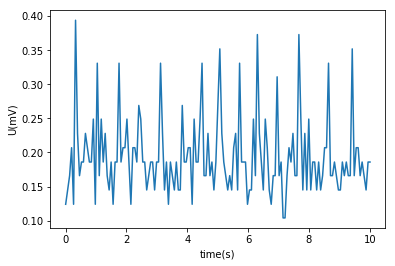

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

time = []
start = 0.0
signal = []
time_new = []
new_signal = []
spektr = []
spektr_new = []
fileNamee = r"C:\10.txt"

# read file
with open(fileNamee, "r") as file:
    for line in file:
        line_split = line.split('\t')
        time.append(start)
        start += 0.065
        signal.append(float(line_split[1][:-1]))
plt.plot(time, signal)
plt.xlabel('time(s)')
plt.ylabel('U(mV)')

Text(0.5, 0, 'F(Hz)')

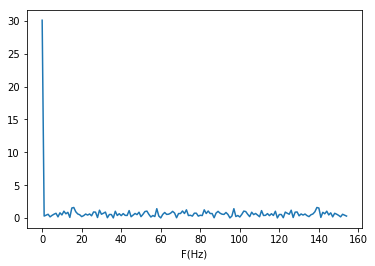

In [4]:
# make spectr of our signal
spektr = abs(np.fft.fft(signal))
plt.plot(spektr)
plt.xlabel('F(Hz)')

Text(0, 0.5, 'U(mV)')

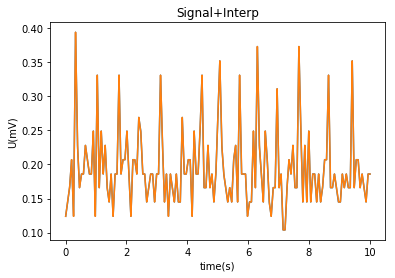

In [5]:
# interpolation
time_new = np.arange(0, 10.01, 0.0001)
new_signal = np.interp(time_new, time, signal)
plt.plot(time, signal)
plt.plot(time_new, new_signal)
plt.title('Signal+Interp')
plt.xlabel('time(s)')
plt.ylabel('U(mV)')

Text(0.5, 1.0, 'Spectr:orange-old, blue-new')

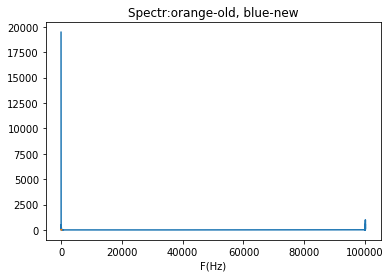

In [6]:
#spectк of interpolated signal
spektr_new = abs(np.fft.fft(new_signal))
plt.plot(spektr_new)
plt.plot(spektr)
plt.xlabel('F(Hz)')
plt.title('Spectr:orange-old, blue-new')

Text(0.5, 1.0, 'Signal:orange-signal, blue-mod')

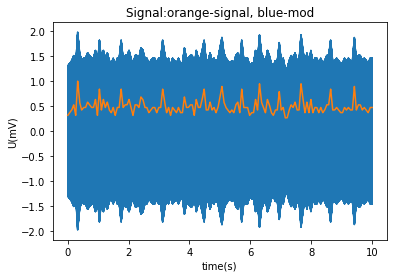

In [8]:
# Amplitude modulation
fd = 1/0.065
f0 = fd*100
w0 = 2*math.pi*f0
m = 1
signal_am = []
norm_new_signal = []
for i in range(0, len(time_new)):
    signal_am.append((1+m*new_signal[i]/max(abs(new_signal)))*math.sin((w0*time_new[i])))
    norm_new_signal.append(new_signal[i]/max(abs(new_signal)))
plt.plot(time_new, signal_am)
plt.plot(time_new, norm_new_signal)
plt.xlabel('time(s)')
plt.ylabel('U(mV)')
plt.title('Signal:orange-signal, blue-mod')

Text(0.5, 1.0, 'Spectr:orange-old, blue-new')

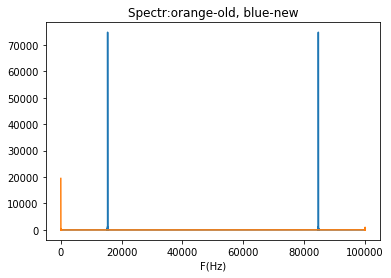

In [9]:
# Amplitude modulation spectr
spektr_mod = abs(np.fft.fft(signal_am))
plt.plot(spektr_mod)
plt.plot(spektr_new)
plt.xlabel('F(Hz)')
plt.title('Spectr:orange-old, blue-new')


Text(0.5, 1.0, 'Signal:orange-signal, blue-mod')

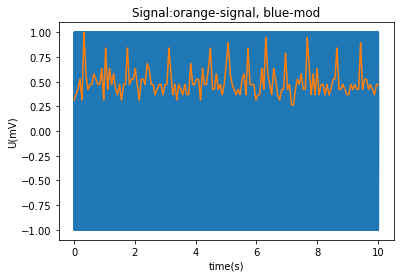

In [11]:
# Frequency modulation
fd = 1/0.065
f0 = fd*10
w0 = 2*math.pi*f0
dw = 20*math.pi
signal_fm = []
integral = 0
for i in range(0, len(time_new)):
    integral = integral + (new_signal[i]/max(abs(new_signal)))*0.065 # переходить от интеграла к сумме?
    signal_fm.append(math.sin((w0*time_new[i])+dw*integral))
plt.plot(time_new, signal_fm)
plt.plot(time_new, norm_new_signal)
plt.xlabel('time(s)')
plt.ylabel('U(mV)')
plt.title('Signal:orange-signal, blue-mod')

Text(0.5, 1.0, 'Spectr:orange-old, blue-new')

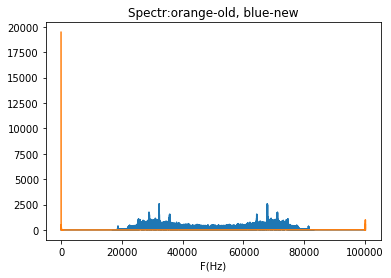

In [12]:
# Frequency modulation spectr
spektr_fm = abs(np.fft.fft(signal_fm))
plt.plot(spektr_fm)
plt.plot(spektr_new)
plt.xlabel('F(Hz)')
plt.title('Spectr:orange-old, blue-new')

Text(0.5, 1.0, 'Signal:orange-signal, blue-mod')

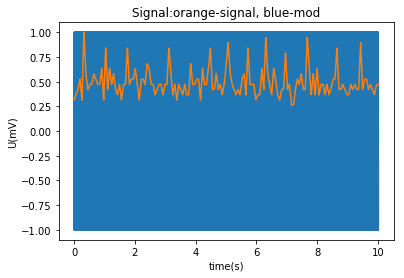

In [14]:
# Phase modulation
fd = 1/0.065
f0 = fd*10
w0 = 2*math.pi*f0
dfi = 10
signal_fi = []
for i in range(0, len(time_new)):
    signal_fi.append(math.sin((w0*time_new[i])+dfi*new_signal[i]/max(abs(new_signal))))
plt.plot(time_new, signal_fi)
plt.plot(time_new, norm_new_signal)
plt.xlabel('time(s)')
plt.ylabel('U(mV)')
plt.title('Signal:orange-signal, blue-mod')


Text(0.5, 1.0, 'Spectr:orange-old, blue-new')

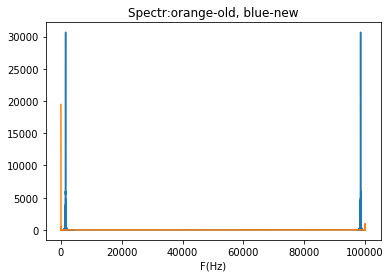

In [15]:
# Phase modulation spectr
spektr_fi = abs(np.fft.fft(signal_fi))
plt.plot(spektr_fi)
plt.plot(spektr_new)
plt.xlabel('F(Hz)')
plt.title('Spectr:orange-old, blue-new')